In [2]:
import pytagcloud
from collections import Counter
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams
from tqdm import tqdm
from nltk import ConditionalFreqDist
from nltk.probability import ConditionalProbDist, MLEProbDist
import warnings
warnings.simplefilter("ignore")

tagger = Okt()

def tokenize(data):
    tokens = ['/'.join(t) for t in tagger.pos(data)]
    return tokens

In [3]:
df = pd.read_csv('addYoutuber.csv', encoding = 'utf-8')
youtuber = list(df.youtuber[i] for i in range(len(df)))

In [6]:
def bigram(Id):
    df = pd.read_csv('{0}.csv'.format(Id), encoding = 'utf-8', engine = 'python')
    sentences = []
    for i in range(len(df)):
        try:
            tokens = tokenize(df.text[i])
            bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
            for t in bigram:
                sentences.append(t)
        except TypeError as e:
            print(e)
            print(Id)
    return sentences

In [4]:
with open('total_bigram.json', 'r') as jsonFile:
    totalBigram = json.load(jsonFile)

In [5]:
totalTokens = [token[0] for token in totalBigram]

In [19]:
totalTokens[:20]

['SS',
 '6:20/Number',
 '6:20/Number',
 '\n/Foreign',
 '6:20/Number',
 '6:20/Number',
 '\n/Foreign',
 '☆/Foreign',
 '하이라이트/Noun',
 '☆/Foreign',
 'SS',
 '3:26/Number',
 '아/Exclamation',
 '네이마르/Noun',
 'SS',
 '이영화/Noun',
 '를/Josa',
 '처음/Noun',
 '보고/Noun',
 '이해/Noun']

In [6]:
import collections
tokenCount = collections.Counter(totalTokens)
sortedToken = sorted(tokenCount.items(), key=lambda x: x[1], reverse=True)
sortedTokenDict = {}
for i in range(len(sortedToken)):
    sortedTokenDict[sortedToken[i][0]] = sortedToken[i][1]

In [15]:
totalCfd = ConditionalFreqDist(totalBigram)

In [16]:
def korean_most_common(c, n, pos=None):
    if pos is None:
        return totalCfd[tokenize(c)[0]].most_common(n)
    else:
        return totalCfd["/".join([c, pos])].most_common(n)

In [84]:
word_list = ['형/Noun', '형/Suffix', '형님/Noun', '이형/Noun','누나/Noun','언니/Suffix', '언니/Noun',
             '대충/Noun', '브로/Noun', '브로앤팁스/Noun', '남자/Noun',
             '대충/Noun', '얼굴/Noun', '피부/Noun', '제품/Noun', '트러블/Noun']

#########################################중요 수정사항 많을 듯########################################

def wordRatio(word):
    kmc = korean_most_common(word, 1000)
    test = {} ##비율이 들어갈 딕셔너리
    for w in kmc:
        try:
            if int(sortedTokenDict[w[0]]) < 10:
                pass
            else:    
                test[w[0]] = int(w[1])/int(sortedTokenDict[w[0]])
        except:
            continue
    sort = sorted(test.items(), key=lambda x: x[1], reverse=True)[:10]
    new = []
    for t in sort:
        if float(t[1]) < 0.1:
            pass
        else:
            new.append(t)
    return new

In [85]:
final = []
for word in word_list:
    final.extend(wordRatio(word))

In [86]:
wordRatio('형')

[('성공했구나/Adjective', 0.45454545454545453),
 ('간염/Noun', 0.4166666666666667),
 ('솔직히말해/Adjective', 0.4),
 ('살빠졌어/Adjective', 0.3),
 ('보야/Adjective', 0.2727272727272727),
 ('죽지마/Verb', 0.23076923076923078),
 ('키몇/Noun', 0.21052631578947367),
 ('과로사/Noun', 0.13636363636363635),
 ('죠죠/Noun', 0.13043478260869565),
 ('추해/Adjective', 0.12903225806451613)]

In [87]:
lastWord = []
for w in final:
    lastWord.append(w[0])

In [88]:
lastWord.extend(word_list)

In [89]:
finalWord = list(set(lastWord))

In [91]:
len(finalWord)

93

In [92]:
with open('finalWord.json', 'w', encoding = 'utf-8') as jsonFile:
    json.dump(finalWord, jsonFile)

In [22]:
import matplotlib.pyplot as plt #matplotlib가 한글폰트를 지원 안해서 미리 처리해주는 과정
import platform                 #아마 요즘 matplotlib는 이런거 안해도 잘 될수도 있어요!

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

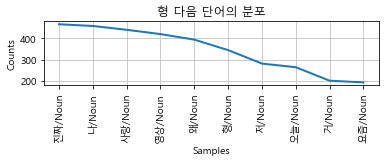

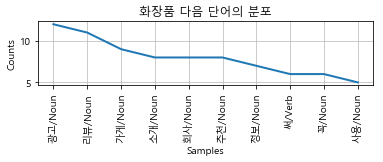

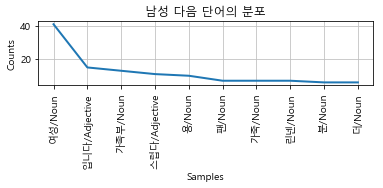

In [33]:
plt.subplot(311)
cfd["형/Noun"].plot(10, title="형 다음 단어의 분포")
plt.subplot(312)
cfd["화장품/Noun"].plot(10, title="화장품 다음 단어의 분포")
plt.subplot(313)
cfd["남성/Noun"].plot(10, title="남성 다음 단어의 분포")

In [102]:
from wordcloud import WordCloud

In [107]:
import nltk

In [124]:
ko=nltk.Text(new,name='오늘의하늘')

{'commit_hash': '523ed2fe5',
 'commit_source': 'installation',
 'default_encoding': '949',
 'ipython_path': 'C:\\Users\\LENOVO\\Anaconda3\\lib\\site-packages\\IPython',
 'ipython_version': '7.2.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.17134-SP0',
 'sys_executable': 'C:\\Users\\LENOVO\\Anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit '
                '(AMD64)]'}


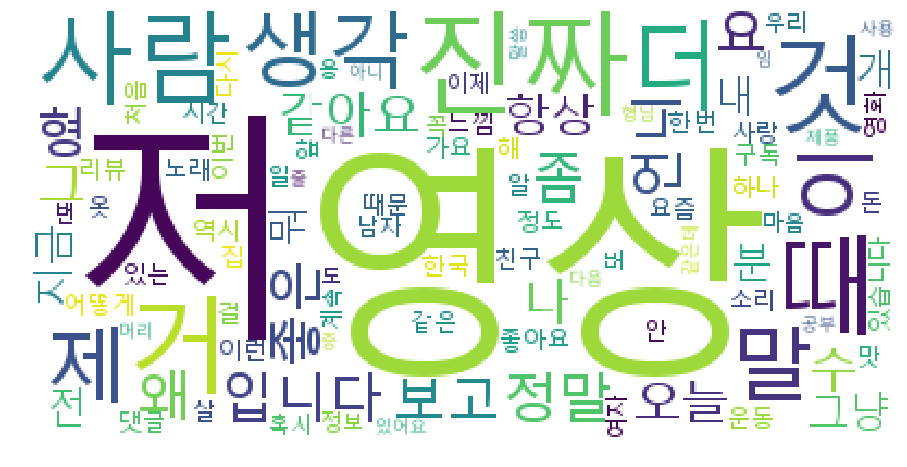

In [125]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import IPython
print(IPython.sys_info())

data=ko.vocab().most_common(100)
tmp_data=dict(data)

wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.2, background_color='white',
                   ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [133]:
stop_words=['저','진짜','제','때','것','정말','항상','청','꼭','거','수','더','좀','이','요','용','이번','전',
           '말','왜','뭐','나','그','보기', '정도', '때문', '한번', '우리', '같아요', '있습니다', '입니다', '살', '있어요', '보고', '좋은',
           '생각', '맛', '또', '댓글', '역시', '느낌', '같은', '어떻게', '하나', '계속', '부분', '사용', '이런', '후', '뭔가', '완전',
           '앞', '지금', '내', '알', '구독', '일', '시간', '돈', '처음', '요즘', '사람', '개', '안', '걸', '소리', '한국', '있는',
           '번', '가요', '혹시', '다시', '집', '해', '마음', '도', '이제', '머리', '정보', '다른', '다음']

new=[each_word for each_word in new if each_word not in stop_words]

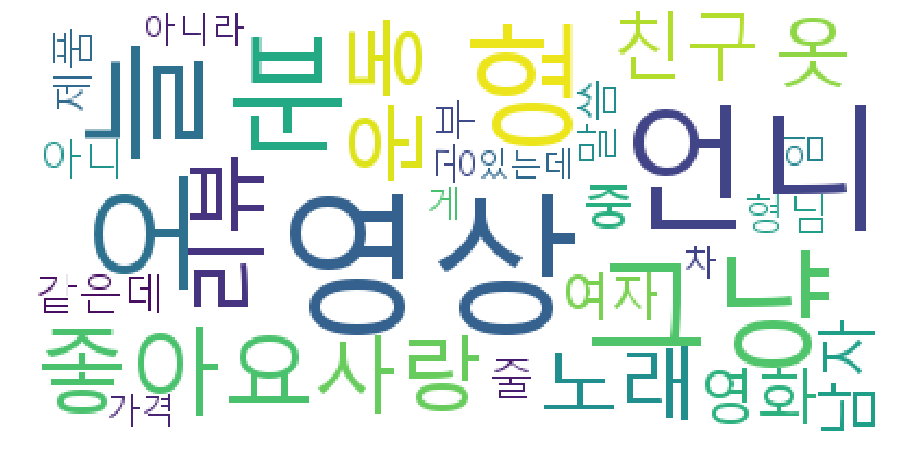

In [134]:
ko=nltk.Text(new,name='오늘의하늘')
data=ko.vocab().most_common(30)
tmp_data=dict(data)

wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.2, background_color='white',
                   ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()